In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

from bs4 import BeautifulSoup
import requests
import urllib
from urllib.request import urlopen
from urllib.parse import urljoin


In [6]:
def count(x):
    if len(x)==0:
        return 0
    else:
        return 1


In [68]:
def indeed_scraper(link,num_pages):
    tech_skills = ['Excel']
    df1 = pd.DataFrame([],columns = tech_skills)
    dfExport = pd.DataFrame([],columns =[''])
    for i in range(num_pages):
        page = urlopen(link)
        soup = BeautifulSoup(page, 'lxml')
        #remember this
        numPosts = soup.findAll(attrs={'rel':['nofollow']})
        for j in numPosts:
            rawPostPages = "http://indeed.com/m/"+j['href']
            response = requests.get(rawPostPages)
#        link in text format
            postPage = response.text
            postSoup = BeautifulSoup(postPage,'lxml')
            postDesc = postSoup.findAll('div',attrs={'id':['desc']})
            skillCount = re.findall(r'[\/b\/]?[Ee]xcel[\/\s,]?', str(postDesc))
            myCount = count(skillCount)
            sumCount = 0
            sumCount=sumCount+myCount
            
            df2 = pd.DataFrame([[sumCount]],columns=tech_skills)
            df1 = pd.concat([df2,df1],axis =0)
            #Save job desc
            dfTemp = pd.DataFrame([[postDesc]],columns =['Description'])
            sf= pd.DataFrame([sumCount],columns=tech_skills)
            dfTemp2 = pd.concat([sf,dfTemp],axis = 1)
            dfExport = pd.concat([dfExport,dfTemp2],axis = 0)
#         Next page
        nextURL = soup.findAll(attrs = {'rel' : ['next']})
    #Next link is replaced
        print('Scraping in progress... ',nextURL)

        link = 'http://www.indeed.com/m/'+ str(nextURL[0]['href'])
    #now lets save all our data
    df1.reset_index(inplace =True)
    df1.drop('index',inplace =True,axis =1)
    df3 = df1.sum(axis=0)
    df4 =pd.DataFrame(df3,columns =['Count'])
    df4.reset_index(inplace=True)
#     change column names
    df4.rename({'index':'tech_skills'},inplace = True,axis = 1)
    totalPosts = len(df1)
    print("total job posts: ", totalPosts)
#     dfExport.drop(',inplace =True,axis =1)
#     dfExport = pd.concat([dfExport,df1],axis=0)
    dfExport.to_excel('./data/jobdes.xlsx')
    df1.to_excel('./data/df1.xlsx')
    df4.to_excel('./data/df4.xlsx')
    

    return (df1,df4,totalPosts)

In [76]:
num_pages = 30
link= 'https://www.indeed.com/m/jobs?q=data+science&l='
results, clean_results, total_jobs = indeed_scraper(link,num_pages)

C:\Users\as630696\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



total job posts:  327


In [77]:
def plot_count(x,total, title):
    sns.set()
    print('Number of Jobs:', total)
    print(x)
    plt.figure(figsize = (12,8))
    sns.barplot(x='tech_skills', y='Count', data=x).set_title(title,fontsize=20)
    plt.xlabel('Skill',fontsize=15)
    plt.ylabel('Count: '+str(clean_results),fontsize=15)
    ax = plt.gca()
    for nr, p in enumerate(ax.patches):
        height = round(p.get_height(),0)
        ax.text(nr, height + 1.5,'{}'.format(height), color='black',fontsize=15,  ha='center', va='center')


Number of Jobs: 327
  tech_skills  Count
0       Excel  135.0


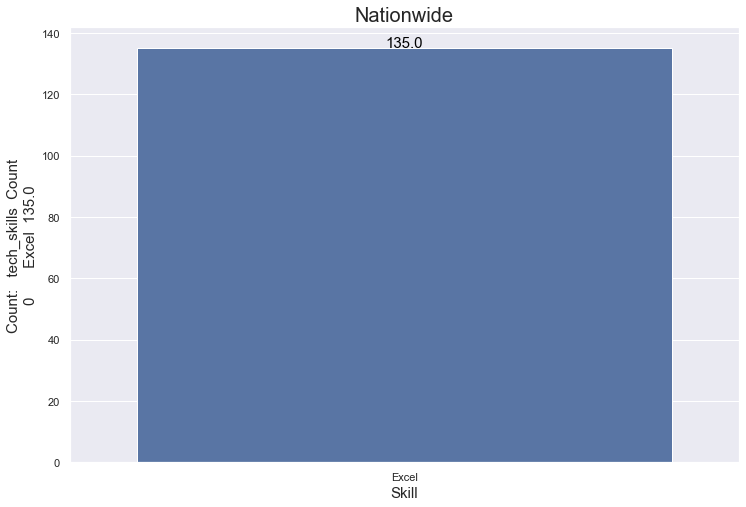

In [78]:
plot_count(clean_results, total_jobs, 'Nationwide')
